# Import data

In [1247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings("ignore")


In [1248]:
df = pd.read_csv('dataset\Marketing Campaign\marketing_campaign.csv',sep=';')

# Pre-Processing

- Handle missing values
- Handle duplicated data
- Handle outliers
- Feature encoding

## Data Cleansing

### Handle missing values

In [1249]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [1250]:
df.shape

(2240, 29)

In [1251]:
#persentasi missing data
percent_na = (df.isna().sum().sum())/(df.shape[0])*100
print(f'{round(percent_na,2)}%')

1.07%


In [1252]:
#Karena missing value sekitar 1% dari dataset kita akan drop
df = df.dropna(axis=0)

Missing value hanya terdapat pada kolom income dengan jumlah 24, nilai ini cenderung kecil dibandingkan dengan keseluruhan data (2240) sehingga diperkirakan tidak akan berpengaruh pada model. Dengan presentase 1% missing terhadap total data maka akan didrop.


### Handle duplicated data

In [1253]:
df.duplicated().sum()

0

Tidak terdapat data duplicate pada dataset

### Handle outliers

In [1254]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


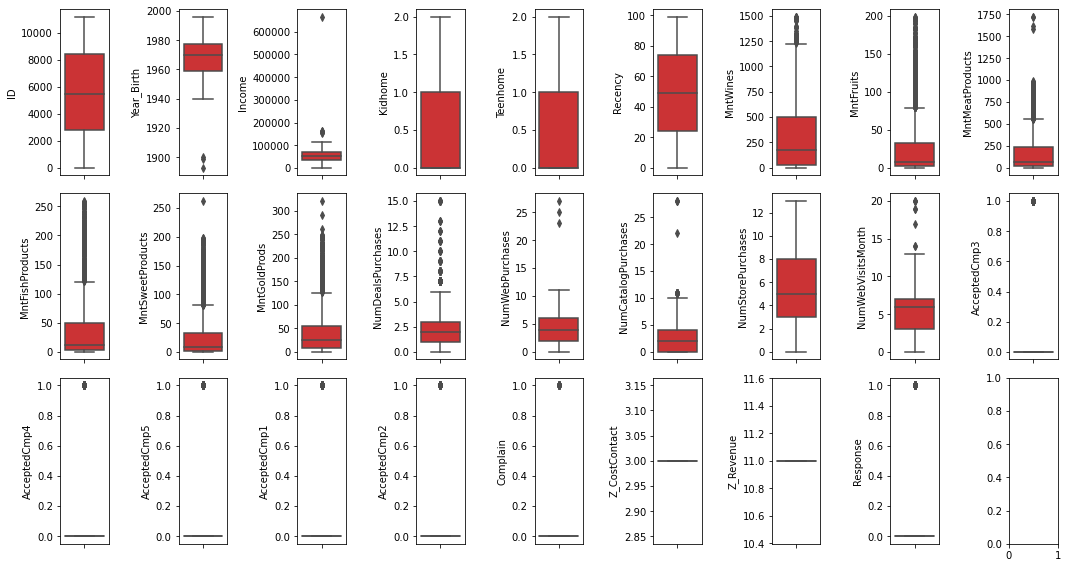

In [1255]:
dft = df.copy()
num = [i for i in df.columns if df[i].dtype != 'object']

fig, ax = plt.subplots(3,9,figsize=(15,8))

a=0
b=0
for i in num:
    sns.boxplot(data=dft,y=i,ax=ax[a,b],palette='Set1')
    b += 1
    if b == 9:
        a += 1
        b = 0

plt.tight_layout()
plt.show()

In [1256]:
#Terdapat outliers yang sangat ekstrem pada kolom Income dan Year_Birth sehingga akan 
#kita coba bandingkan presentase outliers dengan IQR dan Z Score

def check_outliers(x):
    global df
    q1 = df[x].quantile(0.25)
    q3 = df[x].quantile(0.75)
    iqr = q3 - q1
    low_lim = q1 - (1.5 * iqr)
    hi_lim = q3 + (1.5 * iqr)
    filterred = ((df[x]<low_lim) | (df[x]>hi_lim))
    df_out = df[filterred]
    percent_out = (df_out.shape[0])/(df.shape[0])*100
    print(f'Presentase outlier {x}:',round(percent_out,2),'%')

for i in num:
    check_outliers(i)

Presentase outlier ID: 0.0 %
Presentase outlier Year_Birth: 0.14 %
Presentase outlier Income: 0.36 %
Presentase outlier Kidhome: 0.0 %
Presentase outlier Teenhome: 0.0 %
Presentase outlier Recency: 0.0 %
Presentase outlier MntWines: 1.58 %
Presentase outlier MntFruits: 11.1 %
Presentase outlier MntMeatProducts: 7.85 %
Presentase outlier MntFishProducts: 10.02 %
Presentase outlier MntSweetProducts: 11.1 %
Presentase outlier MntGoldProds: 9.25 %
Presentase outlier NumDealsPurchases: 3.79 %
Presentase outlier NumWebPurchases: 0.14 %
Presentase outlier NumCatalogPurchases: 1.04 %
Presentase outlier NumStorePurchases: 0.0 %
Presentase outlier NumWebVisitsMonth: 0.36 %
Presentase outlier AcceptedCmp3: 7.36 %
Presentase outlier AcceptedCmp4: 7.4 %
Presentase outlier AcceptedCmp5: 7.31 %
Presentase outlier AcceptedCmp1: 6.41 %
Presentase outlier AcceptedCmp2: 1.35 %
Presentase outlier Complain: 0.95 %
Presentase outlier Z_CostContact: 0.0 %
Presentase outlier Z_Revenue: 0.0 %
Presentase outlie

Karena outliers mayoritas dibawah 1% maka kita akan menggunakan Zscore untuk handling outliers. Kolom Response kita exclude karena merupakan target dan kolom AcceptedCmp dan Complain yang merupakan categorical

In [1257]:
num

['ID',
 'Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [1258]:
#Handling outliers pada beberapa kolom dengan Zscoe
num_outlier = ['Year_Birth','Income','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
               'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 
               'NumWebVisitsMonth']
df_before = df[num_outlier].copy() #DataFrame Sebagai perbandingan

outliers_ = [num_outlier] #List outliers

def zscore_handling(x):
    global df
    z_score = np.abs(stats.zscore(df[x]))
    filtered = (z_score < 3)
    df = df[filtered]

for i in outliers_:
    zscore_handling('Income')

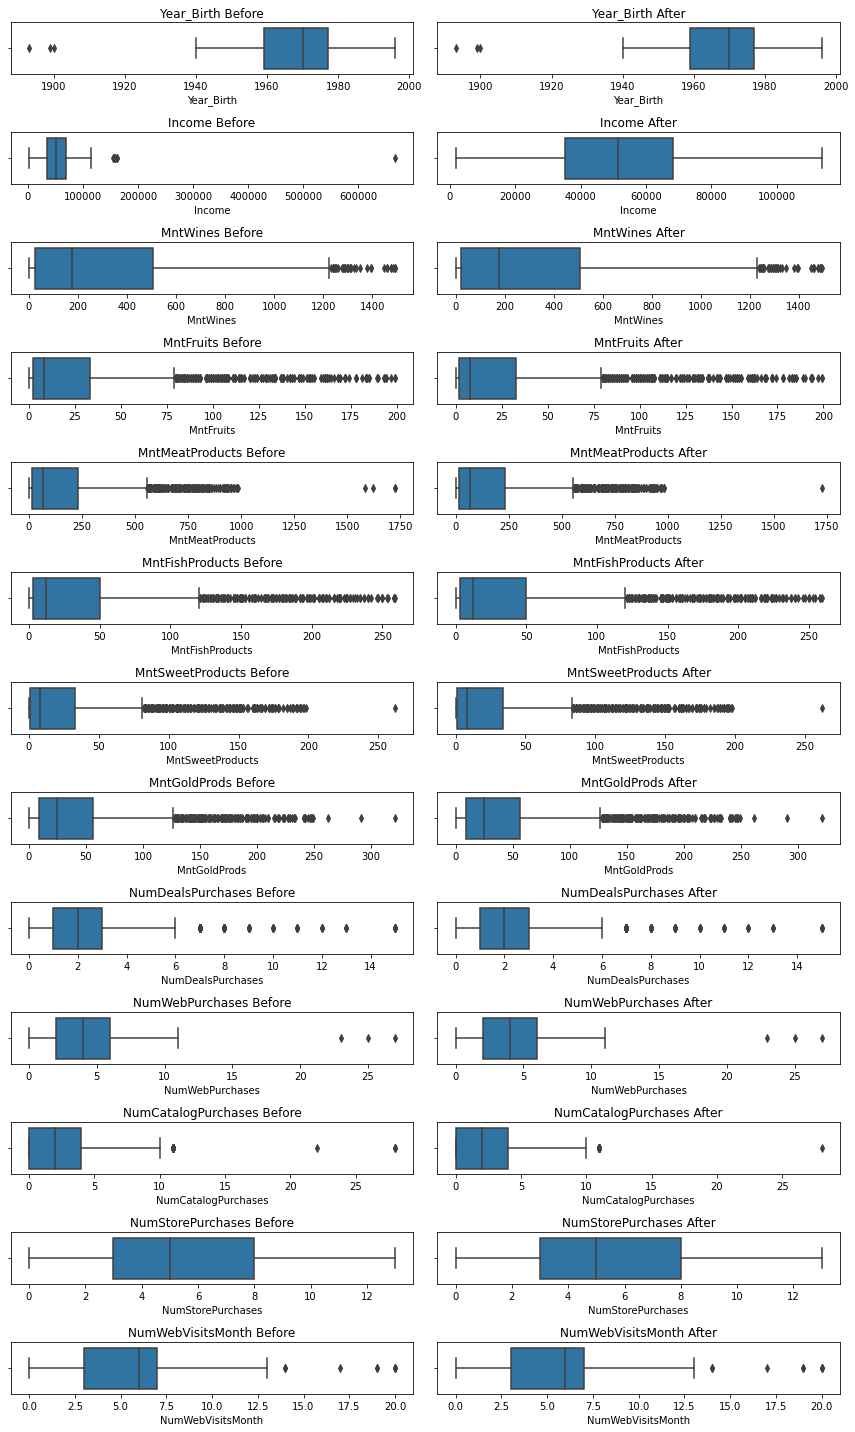

In [1259]:
dft = df.copy()
num = [i for i in df.columns if df[i].dtype != 'object']

fig, ax = plt.subplots(len(num_outlier),2,figsize=(12,20))

a=0
b=0
for i in range(0,len(num_outlier)):
    # sns.boxplot(data=dft,y=i,ax=ax[a,b],palette='Set1')
    sns.boxplot(data=df_before,x=num_outlier[i],ax=ax[i,0])
    ax[i,0].set_title(f'{num_outlier[i]} Before')
    sns.boxplot(data=df,x=num_outlier[i],ax=ax[i,1])
    ax[i,1].set_title(f'{num_outlier[i]} After')
    b += 1
    if b == 2:
        a += 1
        b = 0

plt.tight_layout()
plt.show()

Pada beberapa kolom terlihat perbedaan distribusi yang menuju distribusi normal

### Feature encoding
Kita lakukan label encode(LE) dan One Hot Encoding(OHE) pada Education dan OHE pada Marital_Status

In [1260]:
#Kriteria LE
edu = {'Basic':0,'Graduation':1,'2n Cycle':2,'Master':3,'PhD':4}

In [1261]:
#OHE
cat = ['Education', 'Marital_Status']
df_OHE = pd.get_dummies(df[cat])
df = pd.concat([df,df_OHE],axis=1)

In [1262]:
#LE
df['Education_LE'] = df['Education'].map(edu)
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_LE
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,1,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,1,0,0,0,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,1,0,0,1


In [1263]:
#Kita drop kolom yang telah diOHE
df = df.drop(columns=cat, axis=1)

### Log Transformation
Dilakukan transformasi log(x + 1), karena jika log(x) saja pada nilai values 0 akan menghasilkan nilai infinity


In [1264]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2208.0,5586.900815,3249.110303,0.0,2814.75,5458.5,8418.50,11191.0
Year_Birth,2208.0,1968.807065,11.991913,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2208.0,51633.638134,20713.376530,1730.0,35196.00,51301.0,68289.75,113734.0
Kidhome,2208.0,0.442029,0.537063,0.0,0.00,0.0,1.00,2.0
Teenhome,2208.0,0.506341,0.544325,0.0,0.00,0.0,1.00,2.0
Recency,2208.0,49.014040,28.938638,0.0,24.00,49.0,74.00,99.0
MntWines,2208.0,306.100996,337.516270,0.0,24.00,177.5,507.00,1493.0
MntFruits,2208.0,26.435236,39.842478,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2208.0,165.347826,217.852649,0.0,16.00,68.0,232.00,1725.0
MntFishProducts,2208.0,37.758605,54.813323,0.0,3.00,12.0,50.00,259.0


In [1265]:
#Dari boxplot sebelumnya sebaran data MntProducts terlihat positive skewed, kita lakukan log transformation
mnt_col = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds']
mnt_col_log = ['MntWines_log', 'MntFruits_log', 'MntMeatProducts_log', 'MntFishProducts_log',
                     'MntSweetProducts_log', 'MntGoldProds_log']

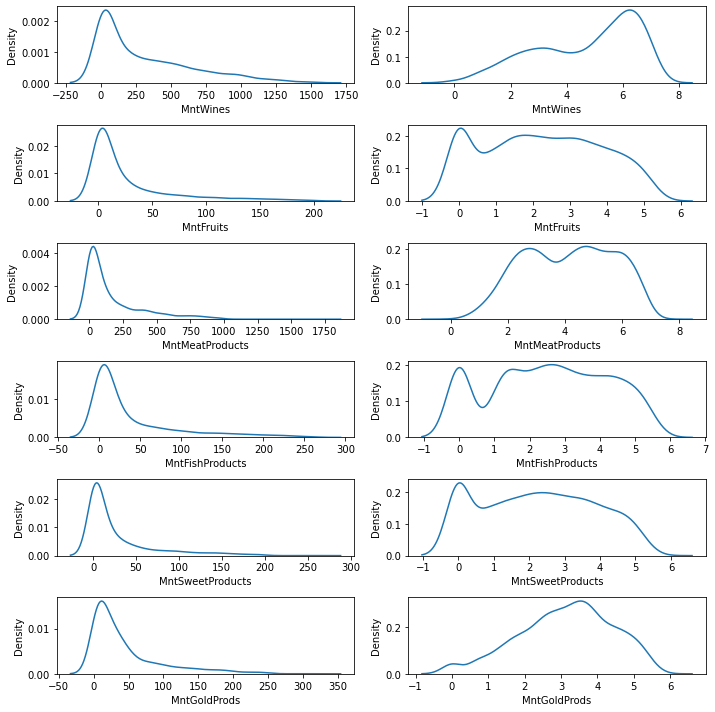

In [1266]:
#Transformasi log(x + 1) dengan menambahkan kolom baru
df[mnt_col_log] = np.log(df[mnt_col] + 1)

#Perbandingan sebelum log dan setelah log
def histo(x):
    fig, ax = plt.subplots(len(x),2,figsize=(10,10))
    for i in range(0,len(x)):
        sns.kdeplot(df[x[i]],ax=ax[i,0])
        sns.kdeplot(np.log(df[x[i]]+1),ax=ax[i,1])
        
    plt.tight_layout()
    plt.show()
histo(mnt_col)

In [1267]:
#Transformasi log(x + 1) dengan menambahkan kolom baru
df[mnt_col_log] = np.log(df[mnt_col] + 1)

In [1268]:
df[mnt_col + mnt_col_log].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntWines_log,MntFruits_log,MntMeatProducts_log,MntFishProducts_log,MntSweetProducts_log,MntGoldProds_log
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,306.100996,26.435236,165.347826,37.758605,27.122283,44.110960,4.685452,2.247095,4.130182,2.542933,2.247046,3.128944
std,337.516270,39.842478,217.852649,54.813323,41.116999,51.852016,1.802094,1.570257,1.555539,1.657927,1.592826,1.284254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,3.218876,1.098612,2.833213,1.386294,0.693147,2.302585
50%,177.500000,8.000000,68.000000,12.000000,8.000000,25.000000,5.184585,2.197225,4.234107,2.564949,2.197225,3.258097
75%,507.000000,33.000000,232.000000,50.000000,34.000000,56.250000,6.230481,3.526361,5.451038,3.931826,3.555348,4.047399
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,7.309212,5.298317,7.453562,5.560682,5.572154,5.774552


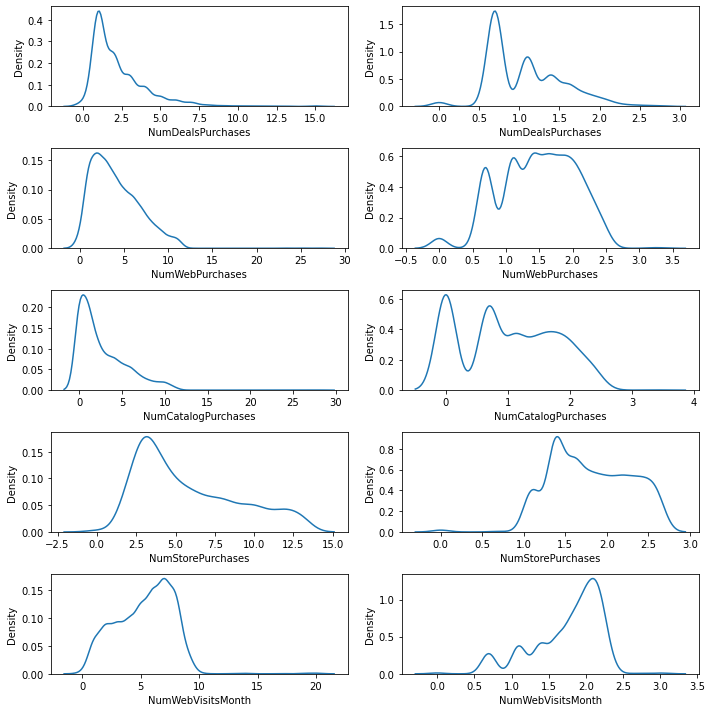

In [1269]:
#Dari boxplot sebelumnya sebaran data NumPurchases terlihat positive skewed, kita lakukan coba lakukan log transformation
num_col = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
histo(num_col)

Num columns tidak kita lakukan log transformation karena cenderung tidak terlalu skewed

### Normalization
Kita aplikasikan Normalizaton kepada semua numerical kolom kecuali kolom Year_Birth,Kidhome,Teenhome, dan family Num columns yang akan kita lakukan Feature extraction terlebih dahulu

In [1270]:
#Copy data untuk normalisasi dan cek correlation
df_check = df.copy()

In [1271]:
# num_col_norm = ['NumDealsPurchases_norm', 'NumWebPurchases_norm', 'NumCatalogPurchases_norm', 'NumStorePurchases_norm',
#                  'NumWebVisitsMonth_norm']
# df[num_col_norm] = df[num_col]

norm_col = [i for i in df_check.columns if df_check[i].dtype != 'object']
for i in norm_col:
    df_check[i] = MinMaxScaler().fit_transform(df_check[i].values.reshape(len(df_check),1))
    
# exceptions_ = ['Year_Birth','Kidhome','Teenhome'] + num_col + mnt_col
# for i in exceptions_:
#     norm_col.remove(i)



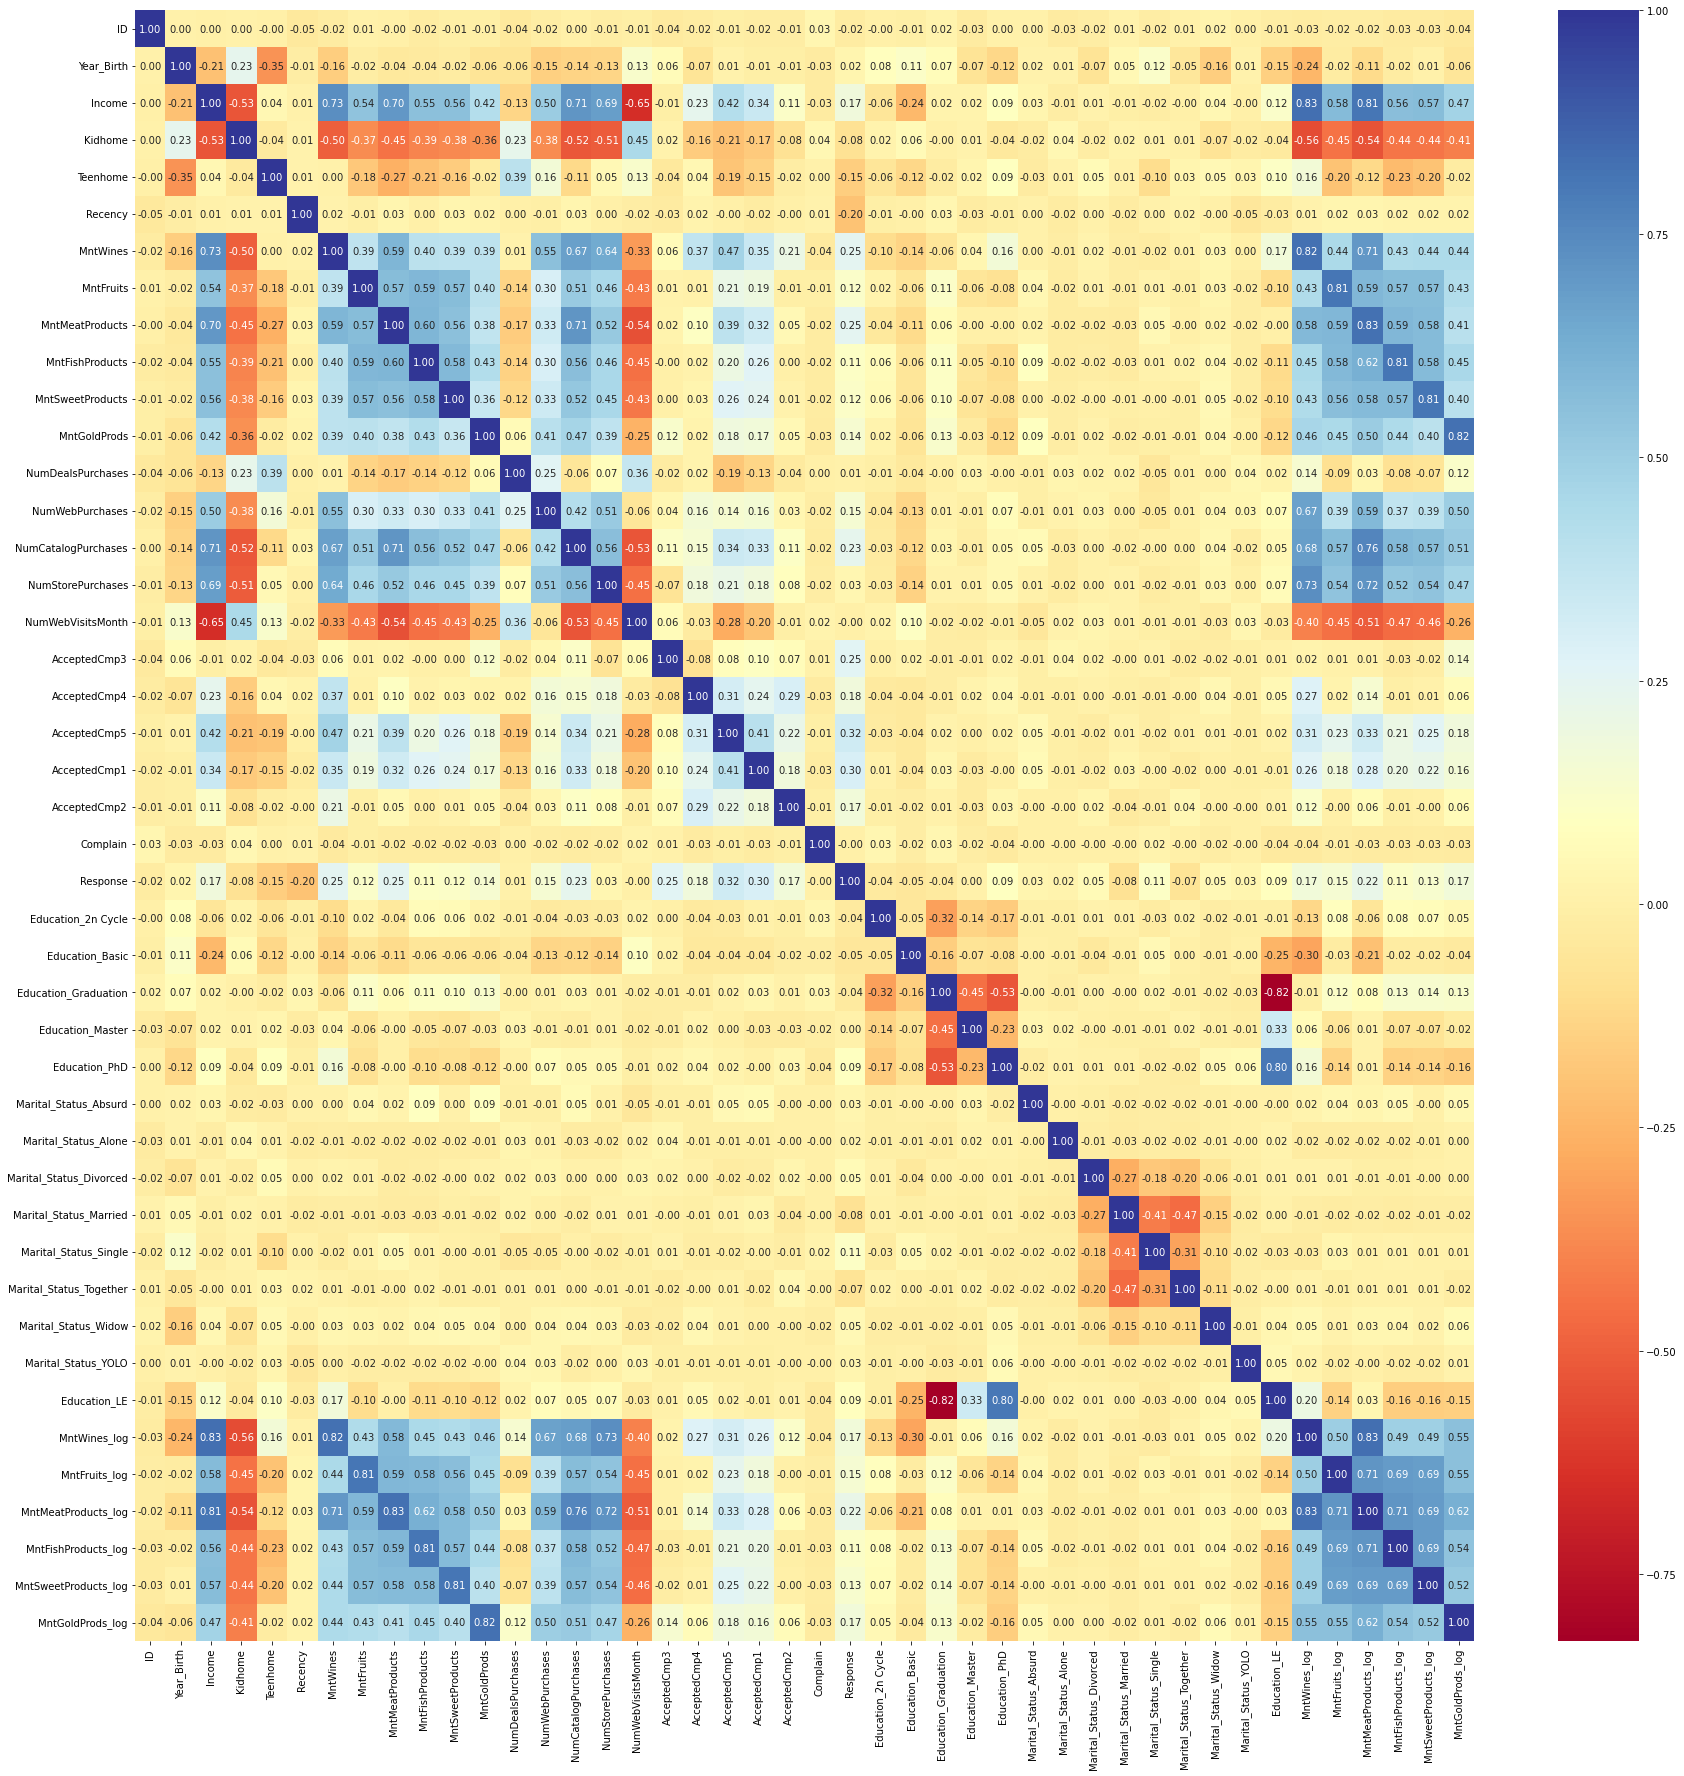

In [1272]:
df_check = df_check.drop(columns=['Z_CostContact','Z_Revenue'])
plt.figure(figsize=(30,30))
sns.heatmap(df_check.corr(), cmap='RdYlBu', annot=True, fmt='.2f')
plt.show()

### Feature extraction

**Ini hanya gambaran aja ya guys**<br>
- Kolom Year_Birth dapat kita ubah menjadi kolom age untuk memudahkan pengamatan
- Kolom Kidhome dan Teenhome dapat kita transformasi menjadi kolom child karena kedua kolom ini memeliki hubungan yang sama terhadap response
- Kolom monetary dari kolom Mnt family
- Kolom frequency dari kolom Num family

In [1273]:
#Check apakah Kolom memiliki keterikatan seperti jika Teenhome > 0 maka Kidhome != 0
df[(df['Kidhome']==0) & (df['Teenhome']!=0)].head(3)

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_LE,MntWines_log,MntFruits_log,MntMeatProducts_log,MntFishProducts_log,MntSweetProducts_log,MntGoldProds_log
5,7446,1967,62513.0,0,1,2013-09-09,16,520,42,98,...,1,0,0,3,6.255750,3.761200,4.595120,0.000000,3.761200,2.708050
6,965,1971,55635.0,0,1,2012-11-13,34,235,65,164,...,0,0,0,1,5.463832,4.189655,5.105945,3.931826,3.912023,3.332205
18,6565,1949,76995.0,0,1,2013-03-28,91,1012,80,498,...,0,0,0,3,6.920672,4.394449,6.212606,0.000000,2.833213,5.176150


In [1274]:
#Buat kolom baru childs
df['childs'] = df['Kidhome'] + df['Teenhome']

#Drop kolom Kidhome dan Teenhome
# df = df.drop(columns=['Kidhome','Teenhome'], axis=1)

In [1275]:
#Buat kolom age
df['age'] = 2020 - df['Year_Birth']

#Drop kolom Year_Birth
# df = df.drop(columns='Year_Birth', axis=1)

In [1276]:
#Kolom baru
df['monetary'] = df["MntFishProducts"] + df["MntFruits"] + df["MntGoldProds"] + df["MntMeatProducts"] + df["MntSweetProducts"] + df["MntWines"]
df['frequency'] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"] + df["NumWebVisitsMonth"] + df["NumDealsPurchases"]
df['total_cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']  


In [1277]:
df_check = df.copy()
norm_col = [i for i in df_check.columns if df_check[i].dtype != 'object']
for i in norm_col:
    df_check[i] = MinMaxScaler().fit_transform(df_check[i].values.reshape(len(df_check),1))

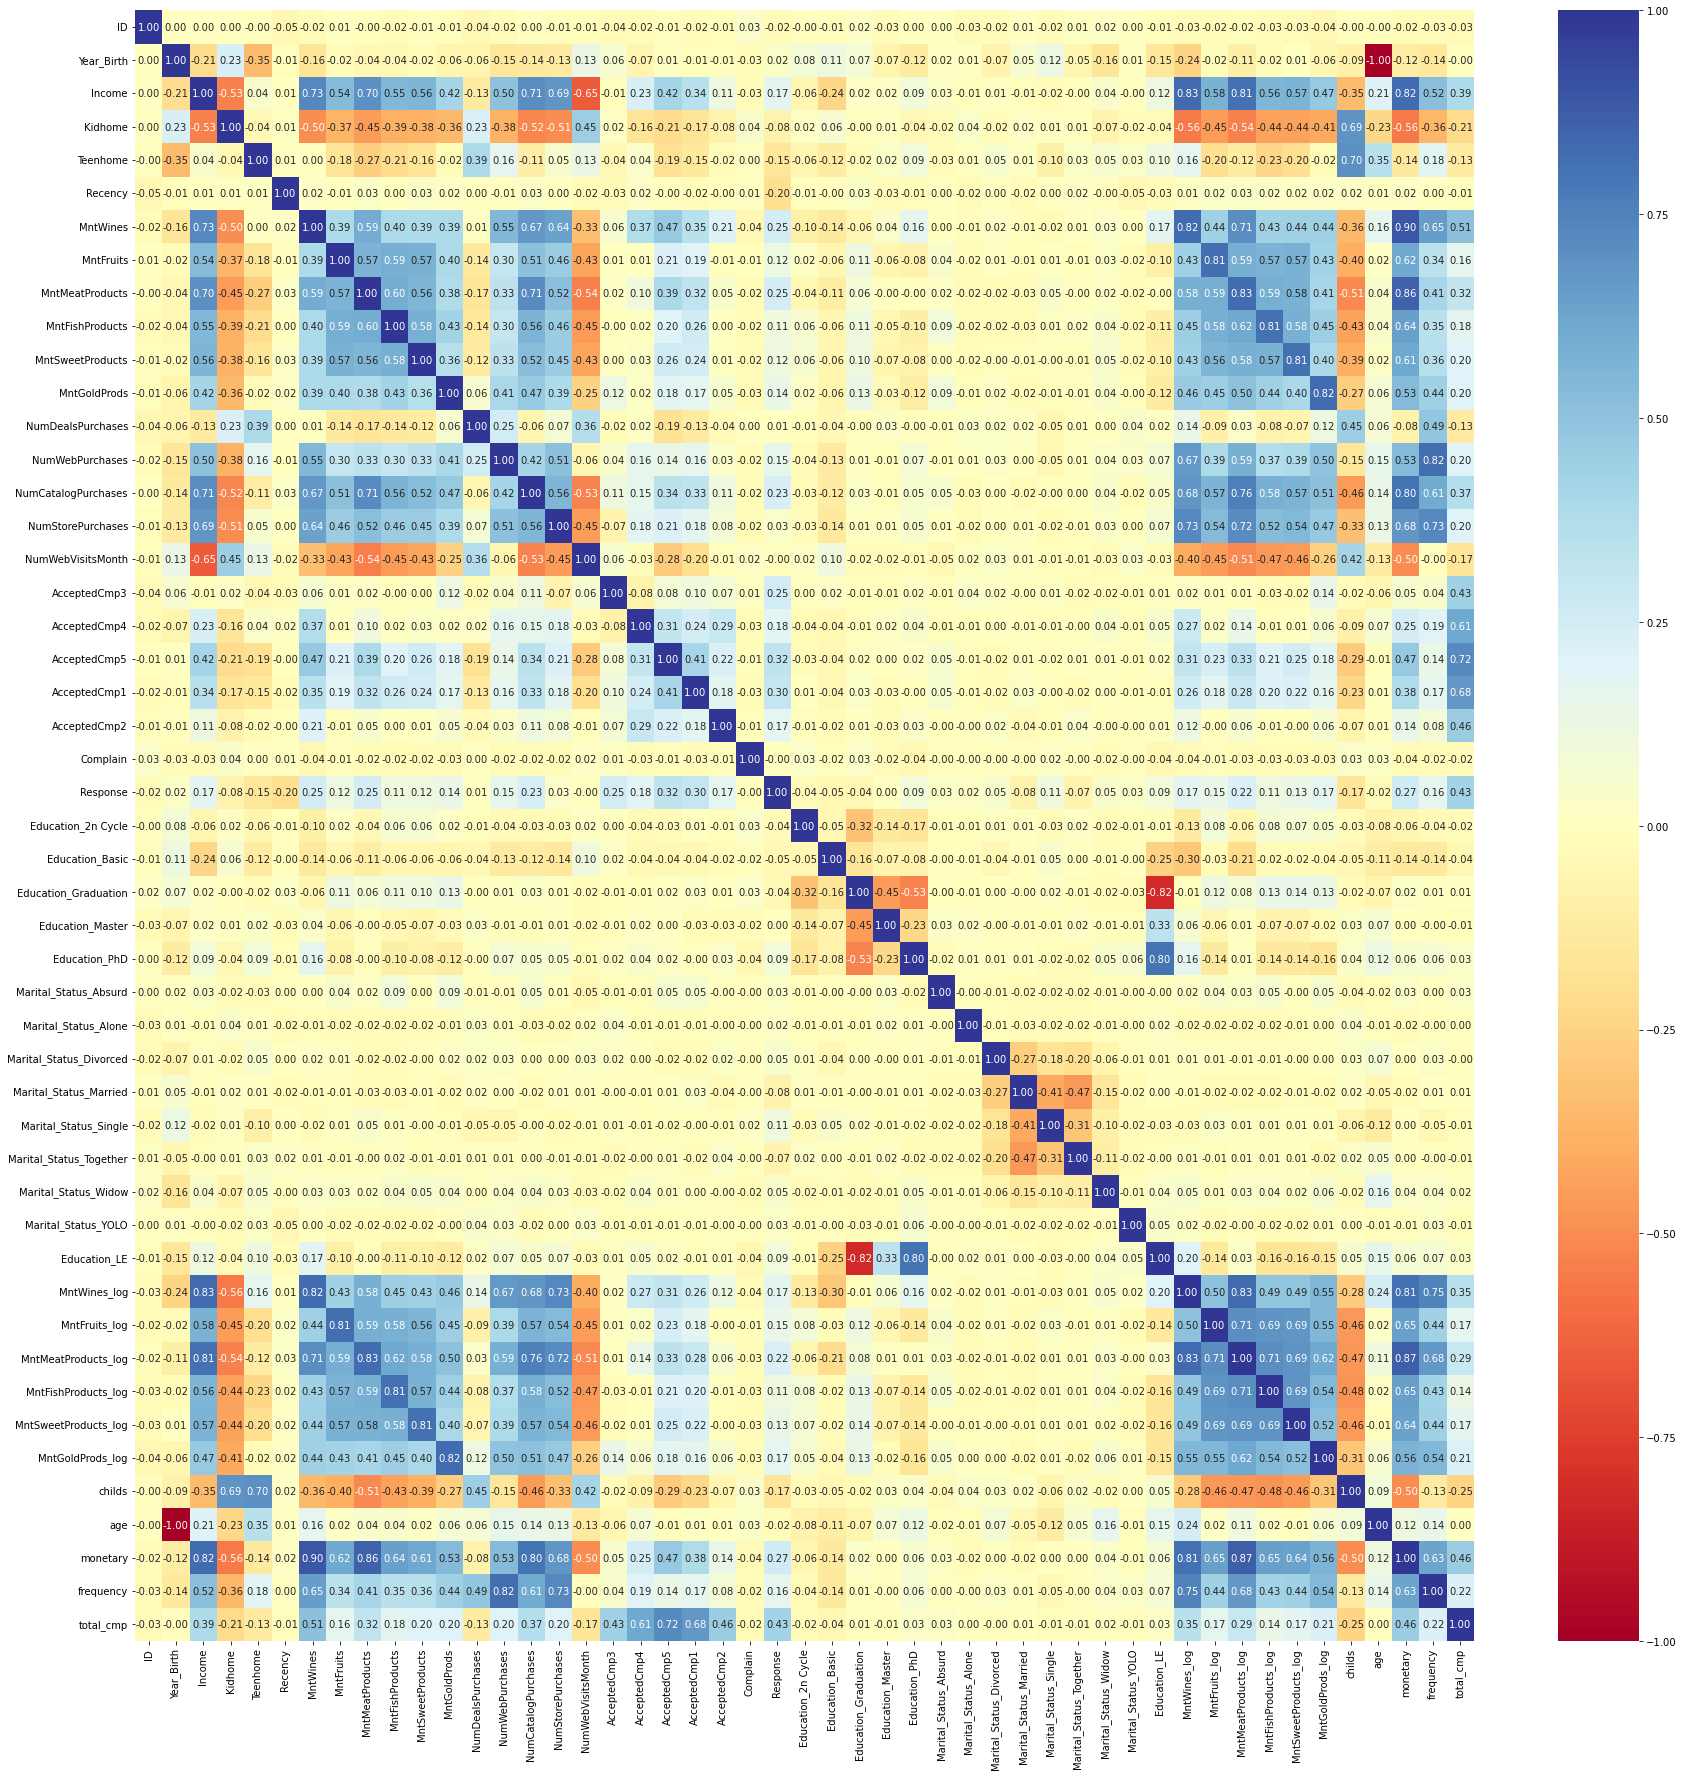

In [1278]:
df_check = df_check.drop(columns=['Z_CostContact','Z_Revenue'])
plt.figure(figsize=(30,30))
sns.heatmap(df_check.corr(), cmap='RdYlBu', annot=True, fmt='.2f')
plt.show()

Terdapat beberapa improvement pada korelasi dengan adanya feature extraction :
- pada kolom childs memiliki korelasi -0.17 terhadap response sedangkan kolom pembentuknya hanya memiliki -0.15 da -0.08
- pada kolom monetary memiliki korelasi 0.27 terhadap response sedangkan korelasi pada famili kolom Mnt memiliki korelasi tertinggi pada 0.25
- pada kolom frequency memiliki korelasi 0.16 sedangkan korelasi pada famili kolom Num memiliki korelasi tertinggi pada 0.23 
- pada kolom age tidak terjadi perbedaan yang signifikan terhadap kolom pembentuknya 
- total cmp memiliki korelasi 0.43 terhadap target sedangkan famili kolom AccCmp memiliki korelasi tertinggi pada 0.32

### Feature Selection
- kolom ID kita drop karena tidak relevan terhadap target
- kolom Z_CostContact dan Z_Revenue kita drop karena merupakan konstanta yang tidak mempengaruhi target

In [1279]:
df.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Education_LE', 'MntWines_log', 'MntFruits_log',
       'MntMeatProducts_log', 'MntFishProducts_log', 'MntSweetProducts_log',
       'MntGoldProds_log', 'childs', 'age', 'monetary', 'freque

In [1280]:
#picked columns
pick_col= ['age','Income','monetary','NumWebPurchases','NumWebPurchases','childs','total_cmp', 'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd','Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO','Response']
len(pick_col)

21

In [1281]:
norm_col = [i for i in df.columns if df[i].dtype != 'object']
for i in norm_col:
    df[i] = MinMaxScaler().fit_transform(df[i].values.reshape(len(df),1))

### Handle class imbalance
Kita akan gunakan imblearn SMOTE untuk menyeimbangkan data target

In [1282]:
# df_good = df[].copy()
# #Split data
X_train, X_test, y_train, y_test = train_test_split(X.values, y, random_state=0,train_size=0.7)

In [1283]:
df = df[pick_col]
# df_good = df.copy()
X = df.copy()
X = X.reset_index()
X = X.drop(columns='index')
y = X.pop('Response')

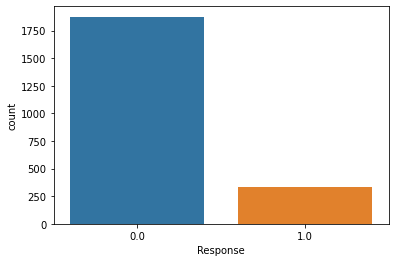

In [1284]:
sns.countplot(y)
plt.show()

In [1285]:
# #Split data
X_train, X_test, y_train, y_test = train_test_split(X.values, y, random_state=0,train_size=0.7)

In [1286]:
#kolom Dt_Customer akan kita drop karena tidak bisa digunakan untuk SMOTE dan juga tidak memiliki korelasi terhadap target
# X = X.drop(columns='Dt_Customer', axis=1) #drop karena tidak releval dengan target 


#Handling Imbalance
X_SMOTE, y_SMOTE = over_sampling.SMOTE().fit_resample(X_train,y_train)

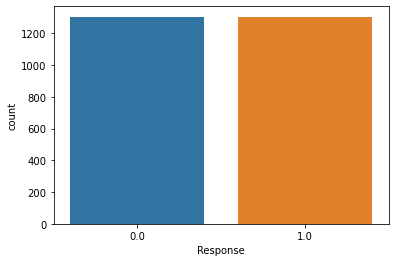

In [1287]:
sns.countplot(y_SMOTE)
plt.show()